In [113]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['mtcars.csv']


In [105]:
# Base de Dadas referente a alguns carros e suas características de desempenho

df = pd.read_csv("../input/mtcars.csv")
df.head(5)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [106]:
# Conhecendo as características das variáveis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
Unnamed: 0    32 non-null object
mpg           32 non-null float64
cyl           32 non-null int64
disp          32 non-null float64
hp            32 non-null int64
drat          32 non-null float64
wt            32 non-null float64
qsec          32 non-null float64
vs            32 non-null int64
am            32 non-null int64
gear          32 non-null int64
carb          32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [107]:
# Amostra aleatória de 10 linhas pela Força do motor do carro (Horse Power - hp)

df['hp'].sample(10)

4     175
31    109
28    264
10    123
8      95
27    113
16    230
17     66
22    150
21    150
Name: hp, dtype: int64

In [108]:
# Estatísticas descritivas da base de dados (Contagem, média, desvio padrão, etc)

df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [109]:
# Contagem de linhas por quantidade de marchas

df['gear'].value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

In [110]:
# Contagem de linhas por quantidade de cilindros

df['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

In [116]:
# Gráfico de barras da quantidade de carros pelo hp

df['hp'].value_counts().plot.barh()

In [117]:
# Gráfico de barras da quantidade de carros pelo qtde de cilindros

df['cyl'].value_counts().plot.barh()

In [ ]:
# Gráfico de barras da quantidade de carros pela quantidade de marchas

df['gear'].value_counts().plot.barh()

In [ ]:
df['gear'].value_counts().plot.pie()

In [ ]:
df['cyl'].value_counts().plot.pie()

In [ ]:
df['hp'].value_counts().plot.pie()

In [118]:
# Separar a marca do nome completo do carro (marca e modelo)

df['Unnamed: 0'].str.split().str[0]

0        Mazda
1        Mazda
2       Datsun
3       Hornet
4       Hornet
5      Valiant
6       Duster
7         Merc
8         Merc
9         Merc
10        Merc
11        Merc
12        Merc
13        Merc
14    Cadillac
15     Lincoln
16    Chrysler
17        Fiat
18       Honda
19      Toyota
20      Toyota
21       Dodge
22         AMC
23      Camaro
24     Pontiac
25        Fiat
26     Porsche
27       Lotus
28        Ford
29     Ferrari
30    Maserati
31       Volvo
Name: Unnamed: 0, dtype: object

In [119]:
# Criar coluna com a marca do carro a partir da separação da marca do modelo

df['brand_car']=df['Unnamed: 0'].str.split().str[0]

In [120]:
df.head(3)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand_car
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun


In [ ]:
# contagem de carros por marca-modelo

df['Unnamed: 0'].value_counts()

In [121]:
# Contagem de carros por marca. É possível perceber um agrupamento, visto que há
# mais de um modelo em algumas marcas

df['brand_car'].value_counts()

Merc        7
Fiat        2
Mazda       2
Toyota      2
Hornet      2
Ferrari     1
Valiant     1
Chrysler    1
Ford        1
Dodge       1
Camaro      1
AMC         1
Maserati    1
Datsun      1
Duster      1
Pontiac     1
Porsche     1
Lincoln     1
Lotus       1
Cadillac    1
Honda       1
Volvo       1
Name: brand_car, dtype: int64

In [122]:
# Gráfico de barras com a quantidade de carros por marca

df['brand_car'].value_counts().plot.bar()

In [ ]:
import seaborn as sns

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
Unnamed: 0    32 non-null object
mpg           32 non-null float64
cyl           32 non-null int64
disp          32 non-null float64
hp            32 non-null int64
drat          32 non-null float64
wt            32 non-null float64
qsec          32 non-null float64
vs            32 non-null int64
am            32 non-null int64
gear          32 non-null int64
carb          32 non-null int64
brand_car     32 non-null object
dtypes: float64(5), int64(6), object(2)
memory usage: 3.3+ KB


In [124]:
# Boxplot de hp por quantidade de marchas

sns.boxplot(x='gear',y='hp', data=df)

In [125]:
# Boxplot de hp por quantidade de cilindros

sns.boxplot(x='cyl',y='hp', data=df)

In [ ]:
sns.countplot(x='cyl', data=df)

In [127]:
sns.countplot(x='gear', data=df)

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


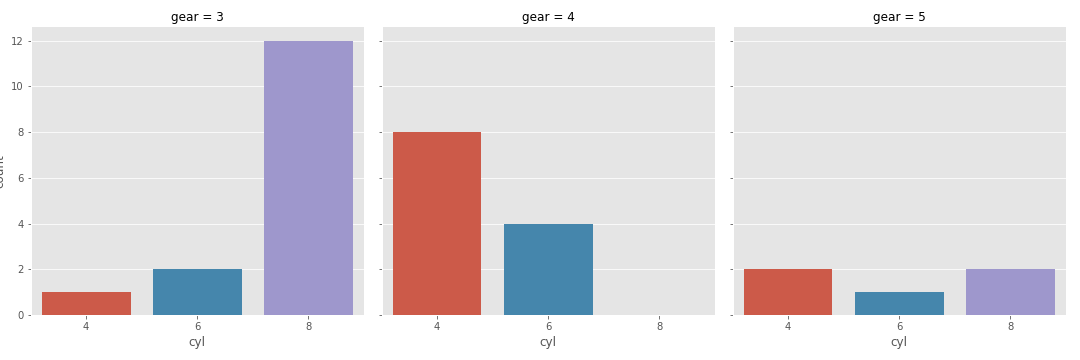

In [126]:
# Graficos de barra da quantidade carros por qtde de cilindros em cada qtde de marchas

sns.factorplot(x='cyl', data=df, col ='gear', kind = 'count')

In [ ]:
sns.factorplot(x='hp', data=df, col ='gear', kind = 'count')

In [ ]:
sns.countplot(x='gear', hue='cyl', data=df)

In [ ]:
# histograma pela qtde de carros pela força (hp)

import matplotlib
%matplotlib notebook
df['hp'].hist(bins=10, color='black')

<IPython.core.display.Javascript object>


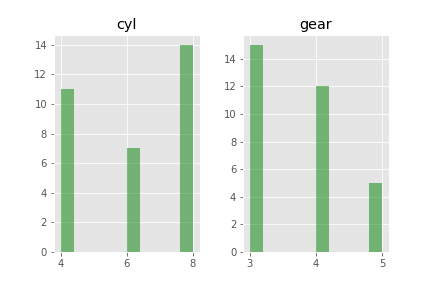

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76450c0470>,
      dtype=object)

In [128]:
df[['gear','cyl']].hist(bins=10,alpha=0.5,color='Green')

<IPython.core.display.Javascript object>


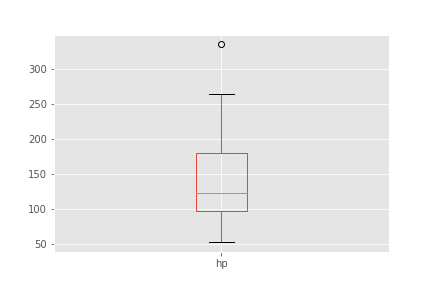

In [129]:
%matplotlib notebook
matplotlib.style.use('ggplot')
df.boxplot(column='hp')

<IPython.core.display.Javascript object>


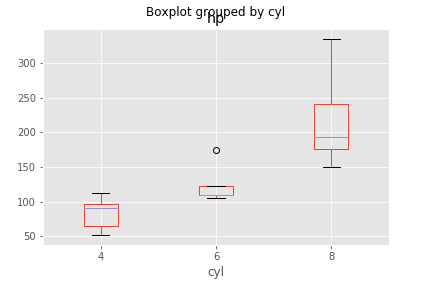

In [130]:
# É possível perceber que a força do carro (hp) cresce quando a qtde de cilindros cresce

%matplotlib notebook
df.boxplot(column='hp', by='cyl')

In [131]:
# É possível verificar que há muitas correlações fortes entre as variáveis (>|70%|)
# Um exemplo disso é variável Força (hp) e a variável qsec(0 a 100 km por segundo)

df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


<IPython.core.display.Javascript object>


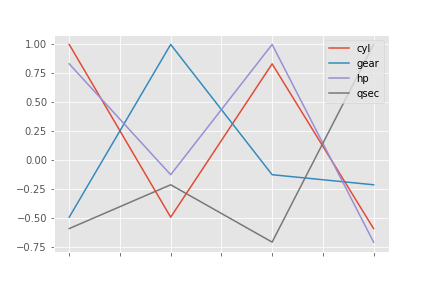

In [132]:
# Gráfico mostra correlação positiva forte entre hp e cyl
# Gráfico mostra correlação negativa forte entre hp e qsec
# as demais são fracas ou moderadas


%matplotlib notebook
df[['cyl','gear','hp','qsec']].corr().plot()

In [ ]:
df.pivot_table('hp',index=["cyl","gear"],aggfunc='count',margins=True)

In [ ]:
pd.crosstab(df['cyl'],df['gear'])

<IPython.core.display.Javascript object>


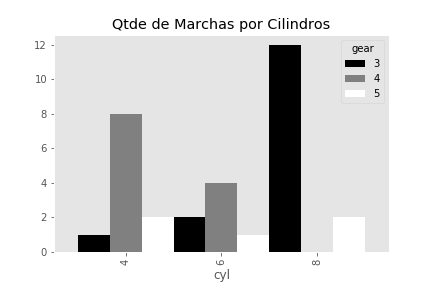

In [133]:
table = pd.crosstab(df['cyl'],df['gear'])
table.plot(kind='bar',width=1.0, color=['black','gray','white'], title='Qtde de Marchas por Cilindros' ,grid=False)